<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Zero2All" data-toc-modified-id="Zero2All-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Zero2All</a></span><ul class="toc-item"><li><span><a href="#linear-model" data-toc-modified-id="linear-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>linear model</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Exercise-3-1-computer-gradient" data-toc-modified-id="Exercise-3-1-computer-gradient-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Exercise 3-1 computer gradient</a></span></li></ul></li><li><span><a href="#Back-propagation" data-toc-modified-id="Back-propagation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Back propagation</a></span><ul class="toc-item"><li><span><a href="#Exercise-4-4:-Compute-gradients-using-computional-graph-(manially)" data-toc-modified-id="Exercise-4-4:-Compute-gradients-using-computional-graph-(manially)-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Exercise 4-4: Compute gradients using computional graph (manially)</a></span></li></ul></li><li><span><a href="#Linear-regression-in-PyTorch-way" data-toc-modified-id="Linear-regression-in-PyTorch-way-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Linear regression in PyTorch way</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Wide-and-Deep" data-toc-modified-id="Wide-and-Deep-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Wide and Deep</a></span><ul class="toc-item"><li><span><a href="#Exercise-7-1-值得一做！（未完待续）" data-toc-modified-id="Exercise-7-1-值得一做！（未完待续）-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Exercise 7-1 值得一做！（未完待续）</a></span></li></ul></li><li><span><a href="#PyTorch-Dataloader" data-toc-modified-id="PyTorch-Dataloader-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>PyTorch Dataloader</a></span></li><li><span><a href="#Softmax-classifier" data-toc-modified-id="Softmax-classifier-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Softmax classifier</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Dataset</a></span></li></ul></li><li><span><a href="#Basic-CNN" data-toc-modified-id="Basic-CNN-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Basic CNN</a></span></li><li><span><a href="#Advanced-CNN" data-toc-modified-id="Advanced-CNN-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Advanced CNN</a></span></li><li><span><a href="#RNN" data-toc-modified-id="RNN-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>RNN</a></span></li></ul></li></ul></div>

MNIST数据集所在`C:\Users\HYJ\Desktop\Jupyter\torch\data\mnist_data`

在当前文件夹可以直接写在这 `./data/mnist_data/`

# Zero2All

In [1]:
import torch
print(torch.__version__) 

0.4.1


> pytorch0.4.1可以运行
>
> https://github.com/hunkim/PyTorchZeroToAll

## linear model 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# latex
from IPython.display import Latex
# torch0.4.1
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

w= 0.0
	 1.0 2.0 0.0 1
	 2.0 4.0 0.0 1
	 3.0 6.0 0.0 1
MSE = 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 1
	 2.0 4.0 0.2 1
	 3.0 6.0 0.30000000000000004 1
MSE = 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 1
	 2.0 4.0 0.4 1
	 3.0 6.0 0.6000000000000001 1
MSE = 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 1
	 2.0 4.0 0.6000000000000001 1
	 3.0 6.0 0.9000000000000001 1
MSE = 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 1
	 2.0 4.0 0.8 1
	 3.0 6.0 1.2000000000000002 1
MSE = 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 1
	 2.0 4.0 1.0 1
	 3.0 6.0 1.5 1
MSE = 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1
	 2.0 4.0 1.2000000000000002 1
	 3.0 6.0 1.8000000000000003 1
MSE = 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1
	 2.0 4.0 1.4000000000000001 1
	 3.0 6.0 2.1 1
MSE = 7.886666666666666
w= 0.8
	 1.0 2.0 0.8 1
	 2.0 4.0 1.6 1
	 3.0 6.0 2.4000000000000004 1
MSE = 6.719999999999999
w= 0.9
	 1.0 2.0 0.9 1
	 2.0 4.0 1.8 1
	 3.0 6.0 2.7 1
MSE = 5.646666

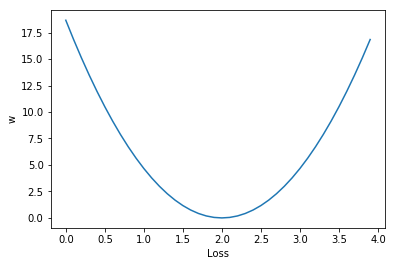

In [15]:
# data
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# random guess
w = 1.0

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

w_list = []
mse_list = []
for w in np.arange(0.0, 4.0, 0.1):
    print('w=', w)
    L_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        L_sum = L_sum + l
        print("\t", x_val, y_val, y_pred_val, 1)
    print("MSE =", L_sum/3)
    w_list.append(w)
    mse_list.append(L_sum/3)
    
plt.plot(w_list, mse_list)
plt.xlabel('Loss')
plt.ylabel('w')
plt.show()

## Gradient Descent 

$w = w - \alpha \dfrac{\partial \rm{loss}}{\partial w} = w - \alpha * 2x(xw - y)$, Gradient $ \dfrac{\partial \rm{loss}}{\partial w} $

In [25]:
# data
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# random guess
w = 1.0
lr = 0.01

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

def gradient(x, y): # d_loss/d_w
    return 2 * x * (x * w - y)

print("predict (before training)", 4, forward(4))

for epoch in range(50):
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - lr * grad
        print("\tgrad:", x_val, y_val, grad)
        l = loss(x_val, y_val)
    print("progress:", epoch, "w =", w, "loss =", l)

print("predict (after training)", 4, forward(4))

predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
progress: 0 w = 1.260688 loss = 4.919240100095999
	grad: 1.0 2.0 -1.478624
	grad: 2.0 4.0 -5.796206079999999
	grad: 3.0 6.0 -11.998146585599997
progress: 1 w = 1.453417766656 loss = 2.688769240265834
	grad: 1.0 2.0 -1.093164466688
	grad: 2.0 4.0 -4.285204709416961
	grad: 3.0 6.0 -8.87037374849311
progress: 2 w = 1.5959051959019805 loss = 1.4696334962911515
	grad: 1.0 2.0 -0.8081896081960389
	grad: 2.0 4.0 -3.1681032641284723
	grad: 3.0 6.0 -6.557973756745939
progress: 3 w = 1.701247862192685 loss = 0.8032755585999681
	grad: 1.0 2.0 -0.59750427561463
	grad: 2.0 4.0 -2.3422167604093502
	grad: 3.0 6.0 -4.848388694047353
progress: 4 w = 1.7791289594933983 loss = 0.43905614881022015
	grad: 1.0 2.0 -0.44174208101320334
	grad: 2.0 4.0 -1.7316289575717576
	grad: 3.0 6.0 -3.584471942173538
progress: 5 w = 1.836707389300983 loss = 0.2399802903801062
	grad: 1.0 2.0 -0.3265852213980338
	grad: 2.0 4.0 -

### Exercise 3-1 computer gradient 

In [7]:
Latex(r'$ \hat{y} = x^2 w_2 + x w_1 + b, \quad \rm{loss} = (\hat{y} - y)^2 $')

<IPython.core.display.Latex object>

一下分别为两个权重的gradient

$\dfrac{\partial \rm{loss}}{w_1} = 2 x (x^2 w_2 + x w_1 + b - y)$

In [7]:
# 训练1000次才有好结果

# data
x_data = [1.0, 2.0, 3.0, 4.0]
y_data = [2.0, 6.0, 12.0, 20.0]

# y = x^2 + x

# random guess
w_1 = 2.0
w_2 = 2.0
b = 4.0
lr_1 = 0.001
lr_2 = 0.0004
lr_3 = 0.01

def forward(x):
    return x * x * w_2 + x * w_1 + b

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

def gradient1(x, y): # d_loss/d_w1
    return 2 * x * (x * x * w_2 + x * w_1 + b - y)

def gradient2(x, y): # d_loss/d_w1
    return 2 * x * x * (x * x * w_2 + x * w_1 + b - y)

def gradient3(x, y): # d_loss/d_w1
    return 2 * (x * x * w_2 + x * w_1 + b - y)

print("predict (before training)", 5, forward(5)) # 30

for epoch in range(1000):
    for x_val, y_val in zip(x_data, y_data):
        grad_1 = gradient1(x_val, y_val)
        grad_2 = gradient2(x_val, y_val)
        grad_3 = gradient3(x_val, y_val)
        w_1 = w_1 - lr_1 * grad_1
        w_2 = w_2 - lr_2 * grad_2
        b = b - lr_3 * grad_3
        print("\tgrad:", x_val, y_val, grad_1, grad_2, b)
        L = loss(x_val, y_val)
    print("progress:", epoch, "w_1 =", w_1, "w_2 =", w_2, "b =", b, "loss =", L)

print("predict (after training)", 5, forward(5))

predict (before training) 5 64.0
	grad: 1.0 2.0 12.0 12.0 3.88
	grad: 2.0 6.0 39.3472 78.6944 3.683264
	grad: 3.0 12.0 91.21633536000002 273.64900608000005 3.3792095488
	grad: 4.0 20.0 163.81726086758403 655.2690434703361 2.96966639663104
progress: 0 w_1 = 1.693619203772416 w_2 = 1.5921550201798655 b = 2.96966639663104 loss = 231.60650228783706
	grad: 1.0 2.0 8.510881241166643 8.510881241166643 2.884557584219374
	grad: 2.0 6.0 26.439107600061874 52.87821520012375 2.7523620462190643
	grad: 3.0 12.0 59.02058475265664 177.0617542579699 2.555626763710209
	grad: 4.0 20.0 103.22092930261533 412.8837172104613 2.297574440453671
progress: 1 w_1 = 1.4964277008759155 w_2 = 1.3316211930159767 b = 2.297574440453671 loss = 91.95322329350503
	grad: 1.0 2.0 6.251246668691126 6.251246668691126 2.2350619737667596
	grad: 2.0 6.0 18.127590638300838 36.255181276601675 2.1444240205752556
	grad: 3.0 12.0 38.352829246936565 115.0584877408097 2.0165812564188004
	grad: 4.0 20.0 64.39111217257059 257.56444869028

## Back propagation 

In [10]:
# torch0.4.1
import torch
from torch.autograd import Variable

# data
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

lr = 0.01

w = Variable(torch.Tensor([1.0]), requires_grad = True)

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

print("predict (before training)", 4, forward(4))

for epoch in range(30):
    for x_val, y_val in zip(x_data, y_data):
        L = loss(x_val, y_val) # forward
        L.backward()
        print("\tgrad:", x_val, y_val, w.grad.data[0])
        w.data = w.data - lr * w.grad.data # 自动进行gradient计算,w.grad即为梯度
        
        w.grad.data.zero_()
    print("progress:", epoch, L.data[0])

print("predict (after training)", 4, forward(4))

predict (before training) 4 tensor([4.], grad_fn=<MulBackward>)
	grad: 1.0 2.0 tensor(-2.)
	grad: 2.0 4.0 tensor(-7.8400)
	grad: 3.0 6.0 tensor(-16.2288)
progress: 0 tensor(7.3159)
	grad: 1.0 2.0 tensor(-1.4786)
	grad: 2.0 4.0 tensor(-5.7962)
	grad: 3.0 6.0 tensor(-11.9981)
progress: 1 tensor(3.9988)
	grad: 1.0 2.0 tensor(-1.0932)
	grad: 2.0 4.0 tensor(-4.2852)
	grad: 3.0 6.0 tensor(-8.8704)
progress: 2 tensor(2.1857)
	grad: 1.0 2.0 tensor(-0.8082)
	grad: 2.0 4.0 tensor(-3.1681)
	grad: 3.0 6.0 tensor(-6.5580)
progress: 3 tensor(1.1946)
	grad: 1.0 2.0 tensor(-0.5975)
	grad: 2.0 4.0 tensor(-2.3422)
	grad: 3.0 6.0 tensor(-4.8484)
progress: 4 tensor(0.6530)
	grad: 1.0 2.0 tensor(-0.4417)
	grad: 2.0 4.0 tensor(-1.7316)
	grad: 3.0 6.0 tensor(-3.5845)
progress: 5 tensor(0.3569)
	grad: 1.0 2.0 tensor(-0.3266)
	grad: 2.0 4.0 tensor(-1.2802)
	grad: 3.0 6.0 tensor(-2.6500)
progress: 6 tensor(0.1951)
	grad: 1.0 2.0 tensor(-0.2414)
	grad: 2.0 4.0 tensor(-0.9465)
	grad: 3.0 6.0 tensor(-1.9592)
progr

### Exercise 4-4: Compute gradients using computional graph (manially)

## Linear regression in PyTorch way 

In [13]:
# torch0.4.1
import torch
from torch.autograd import Variable

## data and model
# 这个地方要单独括号写，不然会报错
x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))

class Model(torch.nn.Module): # sub class of torch.nn.Module
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1) # input:1, output:1
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
# mdoel
model = Model()

## loss and optimizer
#size_average and reduce args will be deprecated, please use reduction='sum' instead.
criterion = torch.nn.MSELoss(reduction='sum') # 原本为size_average = False
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## training, forward, loss, backward, step

lr = 0.01

w = Variable(torch.Tensor([1.0]), requires_grad = True)

# Training loop
for epoch in range(1000):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 不建议视频写法，见https://github.com/hunkim/PyTorchZeroToAll/blob/master/05_linear_regression.py
hour_var = Variable(torch.Tensor([[4.0]]))
y_pred = model(hour_var)
print("predict (after training)",  4, model(hour_var).data[0][0])

0 tensor(102.8475)
1 tensor(45.7887)
2 tensor(20.3876)
3 tensor(9.0797)
4 tensor(4.0457)
5 tensor(1.8047)
6 tensor(0.8070)
7 tensor(0.3628)
8 tensor(0.1650)
9 tensor(0.0769)
10 tensor(0.0376)
11 tensor(0.0201)
12 tensor(0.0122)
13 tensor(0.0087)
14 tensor(0.0071)
15 tensor(0.0063)
16 tensor(0.0059)
17 tensor(0.0057)
18 tensor(0.0056)
19 tensor(0.0055)
20 tensor(0.0054)
21 tensor(0.0053)
22 tensor(0.0052)
23 tensor(0.0051)
24 tensor(0.0051)
25 tensor(0.0050)
26 tensor(0.0049)
27 tensor(0.0048)
28 tensor(0.0048)
29 tensor(0.0047)
30 tensor(0.0046)
31 tensor(0.0046)
32 tensor(0.0045)
33 tensor(0.0044)
34 tensor(0.0044)
35 tensor(0.0043)
36 tensor(0.0042)
37 tensor(0.0042)
38 tensor(0.0041)
39 tensor(0.0041)
40 tensor(0.0040)
41 tensor(0.0039)
42 tensor(0.0039)
43 tensor(0.0038)
44 tensor(0.0038)
45 tensor(0.0037)
46 tensor(0.0037)
47 tensor(0.0036)
48 tensor(0.0036)
49 tensor(0.0035)
50 tensor(0.0035)
51 tensor(0.0034)
52 tensor(0.0034)
53 tensor(0.0033)
54 tensor(0.0033)
55 tensor(0.0032

## Logistic regression 

In [ ]:
# torch0.4.1
import torch
from torch.autograd import Variable

## data and model
# 这个地方要单独括号写，不然会报错
x_data = Variable(torch.Tensor([[20.0], [58.0], [72.0], [99.0]]))
y_data = Variable(torch.Tensor([[0.], [0.], [1.], [1.]]))

class Model(torch.nn.Module): # sub class of torch.nn.Module
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1) # input:1, output:1
    
    def forward(self, x):
        # 新加了一行sigmoid
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
    
# model
model = Model()

## loss and optimizer
# Binary Cross Entropy Loss
criterion = torch.nn.BCELoss(reduction='elementwise_mean') # size_average = True
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
1
# Training loop
for epoch in range(500):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.data)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training
hour_var = Variable(torch.Tensor([[1.0]]))
print("predict 1 hour ", 1.0, model(hour_var).data[0][0] > 0.5)
hour_var = Variable(torch.Tensor([[70.0]]))
print("predict 7 hours", 70.0, model(hour_var).data[0][0] > 0.5)

## Wide and Deep 

many inputs,`torch.nn.Linear(2, 1)`

deep structure: input -> Linear + Sigmoid + ... + Linear + Sigmoid -> output

Sigmoid: **Vanishing Gradient Problem**

ReLu is better! 

More can be seen here: <https://dashee87.github.io/deep%20learning/visualising-activation-functions-in-neural-networks/>

### Exercise 7-1 值得一做！（未完待续）

## PyTorch Dataloader

In [ ]:
import numpy as np
# torch0.4.1
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

# 可以把他做成专门的一个模块
# self dataset
class DiabetesDataset(Dataset):
    def __init__(self):
        # 是否加 .gz 都行
        xy = np.loadtxt('./data/diabetes.csv', delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 0:-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])
    
    # 根据索引，得到具体数据集中的元素
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
                                              
    def __len__(self):
        return self.len

# data
dataset = DiabetesDataset()
train_loader = DataLoader(dataset = dataset,
                         batch_size = 32,
                         shuffle = True,
                         num_workers = 2) # 多线程工作！
                                              
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l1 = torch.nn.Linear(4, 1)
        
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred
                                              
model = Model()
                                              
# training
                                              
for epoch in range(2):
    for i, data in enumerate(train_loader, 0): # 在循环中，使元素带上索引
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
        print(epoch, i, loss.data[0])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

## Softmax classifier 

softmax: $\sigma(\mathbf{z})_j = \dfrac{e^{z_j}}{\sum_{k = 1}^{K} e^{z_k}} \quad (j = 1, \dots, K)$

$ Z = WX + b $ -> $ \hat{y} = s(Z) $ -> $ D(y, \hat{y}) $ (cross entropy)

 cost function $ D(Y, \hat{Y}) = -Y \log \hat{Y} $
 
 下面为一个例子

### Example 

- Cross Entropy in Numpy

In [3]:
import numpy as np
Y = np.array([1, 0, 0])
Y_pred1 = np.array([0.7, 0.2, 0.1])
Y_pred2 = np.array([0.1, 0.3, 0.6])

print("loss1 =", np.sum( - Y * np.log(Y_pred1)))
print("loss2 =", np.sum( - Y * np.log(Y_pred2)))

loss1 = 0.356674943939
loss2 = 2.30258509299


- Cross Entropy in Torch

In [11]:
# 单个数据
import torch
from torch.autograd import Variable
loss = torch.nn.CrossEntropyLoss()

Y = Variable(torch.LongTensor([0]), requires_grad = False) # 指的是在第0位上面是1
Y_pred1 = Variable(torch.Tensor([[2.0, 1.0, 0.1]])) # [0]
Y_pred2 = Variable(torch.Tensor([[0.5, 2.0, 0.3]])) # [1]

L1 = loss(Y_pred1, Y)
L2 = loss(Y_pred2, Y)

print('Loss1 =', L1.data,
    '\nLoss2 =', L2.data,
    '\nLoss1 < Loss2:', L1.data.numpy() < L2.data.numpy())

Loss1 = tensor(0.4170) 
Loss2 = tensor(1.8406) 
Loss1 < Loss2: True


In [13]:
# 多个数据
import torch
from torch.autograd import Variable
loss = torch.nn.CrossEntropyLoss()

Y = Variable(torch.LongTensor([2, 0, 1]), requires_grad = False) # multiple label

Y_pred1 = Variable(torch.Tensor([[0.1, 1.0, 2.0],
                                 [1.1, 0.1, 0.2],
                                 [0.2, 2.1, 0.1]]))
Y_pred2 = Variable(torch.Tensor([[2.0, 0.5, 0.3],
                                 [0.2, 0.3, 0.5],
                                 [0.2, 0.2, 0.5]]))

L1 = loss(Y_pred1, Y)
L2 = loss(Y_pred2, Y)

print('Loss1 =', L1.data,
    '\nLoss2 =', L2.data,
    '\nLoss1 < Loss2:', L1.data.numpy() < L2.data.numpy())

Loss1 = tensor(0.4137) 
Loss2 = tensor(1.4965) 
Loss1 < Loss2: True


(logSoftmax + NLLLoss -> Cross Entropy Loss

具体可见：[PyTorch里的多分类损失函数](http://blog.leanote.com/post/lincent/PyTorch%E9%87%8C%E7%9A%84%E5%A4%9A%E5%88%86%E7%B1%BB%E6%8D%9F%E5%A4%B1%E5%87%BD%E6%95%B0-2)

### Dataset

MNIST $ 28 \times 28 = 784 \rm{pixels} $

- Input layer: 784 pixels
- Hidden layers: 520/320/240/120
- Output layer: 10 labels

```python
self.l1 = torch.nn.Linear(784, 520)
self.l2 = torch.nn.Linear(520, 320)
self.l3 = torch.nn.Linear(320, 240)
self.l4 = torch.nn.Linear(240, 120)
self.l5 = torch.nn.Linear(120, 10)
```

- conv layer: `self.conv1 = nn.Conv2d(in=1, out=10, kernel_size=2)`

- maxpooling: `self.mp = nn.MaxPool2d(kernel_size=2)`

- fully connected: `self.fc = nn.Linear(in=320, out=10)`

In [ ]:
# use to donwload dataset
from torchvision.datasets import MNIST
test_set = MNIST('./data', train=False, download=True)
print('finish!')

## Basic CNN

In [2]:
# 基本网络结构
import torch
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)
        
    def forward(self,x):
        in_size = x.size(0)
        # 以前写作 x = F.relu()
        x = nn.ReLU(self.mp(self.conv1(x)))
        x = nn.ReLU(self.mp(self.conv2(x)))
        x = x.view(in_size, -1) # flatten the tensor 应该是直接拉直
        x = self.fc(x)
        return nn.LogSoftmax(x) # 原来写作F.log_softmax

## Advanced CNN 

Inception模块，多种不同卷积核进行级联使用，1x1可以直接进行维度减少!

Try to implement **Inception Module**

paper [here](https://arxiv.org/pdf/1409.4842.pdf)

```python
# 1
self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)
branch_pool = nn.AvgPool2d(x, kernel_size=3. stride=1, padding=1)
branch_pool = self.branch_pool(branch_pool)

# 2
self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)
branch1x1 = self.branch1x1(x)

# 3
self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)
branch5x5 = self.branch5x5_1(x)
branch5x5 = self.branch5x5_2(branch5x5)

# 3
self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
self.branch3x3dbl_2 = nn.Conv2d(24, 24, kernel_size=3, padding=1)
branch3x3dbl = self.branch3x3dbl_1(x)
branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)
```

- 对于不考虑variable层而言，建议直接写成
nn.functional.avg_pool2d

上面是一个函数

- 对于考虑则写成
nn.AvgPool2d

下面是一个类

```python
torch.nn.functional.avg_pool2d(input, kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True) → Tensor

torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True)
```

- https://pytorch.org/docs/stable/nn.html#pooling-functions

- https://pytorch.org/docs/stable/nn.html#torch.nn.AvgPool2d


1. Filter -> Avg_pool -> 1x1 Conv(24) -> Filter
2. Filter -> 1x1 Conv(16) -> Filter
3. Filter -> 1x1 Conv(16) -> 5x5 Conv(24) -> Filter
4. Filter -> 1x1 Conv(16) -> 3x3 Conv(24) -> 3x3 Conv(24) -> Filter

In [13]:
# 进阶网络结构 inception module
import torch
import torch.nn as nn
import torch.nn.functional as F
class InceptionA(nn.Module):
    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)
        self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3dbl_2 = nn.Conv2d(24, 24, kernel_size=3, padding=1)
        
    def forward(self, x):
        
        branch1x1 = self.branch1x1(x)
        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)
        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)
        #branch_pool = F.avg_pool2d(Variable(x), 3. stride=1, padding=1)
        # 好神奇的写法，其他都不行
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        # concatenate
        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs,1)

- 练习，实现Inception v3/v4
- 进阶学习 ResNet
- 进阶学习 DenseNet

## RNN

粗浅理解：考虑时间性！上个单元样本产生的输出和这个样本共同产生当前的输出

三种模式

- one 2 many
- many 2 one
- many 2 many

参考链接：

- https://www.bilibili.com/video/av15998703
- https://www.bilibili.com/video/av15998549
- http://colah.github.io/posts/2015-08-Understanding-LSTMs/

简单使用
```python
cell = nn.RNN(input_size=4, hidden_size=2, batch_first=True)
cell = nn.GRU(input_size=4, hidden_size=2, batch_first=True)
cell = nn.LSTM(input_size=4, hidden_size=2, batch_first=True)
```

- https://github.com/hunkim/PyTorchZeroToAll
- https://www.bilibili.com/video/av15823922/

未完待续！